In [4]:
import glob

In [21]:
import numpy as np
import os
import matplotlib.pyplot as plt
from elecpy.elecpySession import ElecpySession
import pandas as pd

%matplotlib inline

In [2]:
src_dir = '/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/'
save_dir = '/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-01-25/'
print(save_dir)
if not os.path.exists(save_dir) : os.mkdir(save_dir)

/mnt/Omer/Project/01.PhaseDiscontinuity/AnalysisResults/2019-01-25/


In [112]:
df = pd.DataFrame( {
    'setting' : ['original', '(1)', '(2)', '(3)'] ,
    'session_id' : ['20190129-1','20190125-1','20190125-2','20190125-3'],
    'case_id' : ['Mahajan', 'A', 'B', 'C, D'],
    'simu_id' : [None, '20180823-1', '20180616-1', '20180625-1']
    
})
df

,case_id,session_id,setting,simu_id
0,Mahajan,20190129-1,original,None
1,A,20190125-1,(1),20180823-1
2,B,20190125-2,(2),20180616-1
3,"C, D",20190125-3,(3),20180625-1


In [33]:
!cat ../data.whole.csv

sim_id,gna,gkr,gks,description
20180823-1,12.0,0.0125,0.1386, pinning <<< 20171128-1
20180625-1,15.6,0.0088,0.09702,APD prolongation <<< 20171128-1
20180616-1,10.0,0.0125,0.1386,vortex shedding <<< 20171128-1

In [13]:
!cat ./elecpy/temp/pacing_params.json

{
    "time" : {
        "dt" :0.005,
        "log_cnt" : 200
    },
    "cell_type" : "mahajan",
    "cell_param":{},
    "stim" : {
        "start": 0.0,
        "duration": 0.5,
        "interval": 400.0,
        "train" : 20,
        "amplitude": -80.0
    }
}


In [96]:
!cat ./elecpy/cell/mahajan/kernel.c | grep gca_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtof_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtos_

double _gca = {gca_} * pow({Q10CAL_}, (temp-{temp_})/10.0)/1.4;
double _gtof = {gtof_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.4;
double _gtos = {gtos_} * pow({Q10TO_}, (temp-{temp_})/10.0)*1.4;


In [36]:
!cat ./elecpy/cell/mahajan/const.py | grep gna_
!cat ./elecpy/cell/mahajan/const.py | grep gkr_
!cat ./elecpy/cell/mahajan/const.py | grep gks_

  'gna_'         : 12.0              , #
  'gkr_'         : 0.0125            , #
  'gks_'         : 0.1386            , #


In [19]:
!python ./elecpy/cell/test.py -p ./elecpy/temp/pacing_params.json -d /mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/20190125-1/

cell models pacing test.
/root/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/chainer/cuda.py:84: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cupy-with-cudnn-and-nccl).
  'cuDNN is not enabled.\n'
-------------100
v: -23.8698244628
it: 0.621808829083
st: 0.0
-------------200
v: -85.8303708633
it: 0.0289504432419
st: 0.0
-------------300
v: -87.0631974576
it: 0.00507932166906
st: 0.0
-------------400
v: -87.3767648386
it: 0.00191293184172
st: 0.0
-------------500
v: -62.6063532211
it: 1.22181970832
st: 0.0
-------------600
v: -87.121890853
it: 0.00695109449892
st: 0.0
-------------700
v: -87.4502610951
it: 0.00158525767566
st: 0.0
-------------800
v: -87.5581246368
it: 0.00073715069655
st: 0.0
-------------900
v: -66.4412752081
it: 1.276678968
st: 0.0
-------------1000
v: -87.2347367393
it: 0.00580338778267
st: 0.0
-------------1100
v: -87.5044886309
it: 0.00128897130322
s

In [37]:
!cat ./elecpy/cell/mahajan/const.py | grep gna_
!cat ./elecpy/cell/mahajan/const.py | grep gkr_
!cat ./elecpy/cell/mahajan/const.py | grep gks_

  'gna_'         : 10.0              , #
  'gkr_'         : 0.0125            , #
  'gks_'         : 0.1386            , #


In [38]:
!python ./elecpy/cell/test.py -p ./elecpy/temp/pacing_params.json -d /mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/20190125-2/

cell models pacing test.
/root/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/chainer/cuda.py:84: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cupy-with-cudnn-and-nccl).
  'cuDNN is not enabled.\n'
-------------100
v: -23.7784383903
it: 0.620788705073
st: 0.0
-------------200
v: -85.8291659706
it: 0.0289813319079
st: 0.0
-------------300
v: -87.0627065648
it: 0.005082386981
st: 0.0
-------------400
v: -87.3764588483
it: 0.00191400104228
st: 0.0
-------------500
v: -60.8738891337
it: 1.19449797186
st: 0.0
-------------600
v: -87.1080008867
it: 0.0071894253706
st: 0.0
-------------700
v: -87.4459185562
it: 0.00162051778202
st: 0.0
-------------800
v: -87.55591804
it: 0.000750030779087
st: 0.0
-------------900
v: -64.73375056
it: 1.26538707659
st: 0.0
-------------1000
v: -87.2224744846
it: 0.00600016544933
st: 0.0
-------------1100
v: -87.5003007058
it: 0.00132041286783
st: 

In [42]:
!cat ./elecpy/cell/mahajan/const.py | grep gna_
!cat ./elecpy/cell/mahajan/const.py | grep gkr_
!cat ./elecpy/cell/mahajan/const.py | grep gks_

  'gna_'         : 15.6              , #
  'gkr_'         : 0.0088            , #
  'gks_'         : 0.09702           , #


In [43]:
!python ./elecpy/cell/test.py -p ./elecpy/temp/pacing_params.json -d /mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/20190125-3/

cell models pacing test.
/root/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/chainer/cuda.py:84: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cupy-with-cudnn-and-nccl).
  'cuDNN is not enabled.\n'
-------------100
v: -17.7576213257
it: 0.494395274906
st: 0.0
-------------200
v: -85.6113074012
it: 0.0410600202382
st: 0.0
-------------300
v: -87.0329937502
it: 0.00543692113277
st: 0.0
-------------400
v: -87.3641205274
it: 0.00199505474338
st: 0.0
-------------500
v: -54.8642324965
it: 1.04162573535
st: 0.0
-------------600
v: -87.0748455412
it: 0.00782387522507
st: 0.0
-------------700
v: -87.4361028557
it: 0.00169395816731
st: 0.0
-------------800
v: -87.5503447484
it: 0.00077483285083
st: 0.0
-------------900
v: -61.351913535
it: 1.19495468687
st: 0.0
-------------1000
v: -87.2155007232
it: 0.00615076305704
st: 0.0
-------------1100
v: -87.498214347
it: 0.00133151737008


In [98]:
!cat ./elecpy/cell/mahajan/kernel.c | grep gca_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtof_
!cat ./elecpy/cell/mahajan/kernel.c | grep gtos_
!cat ./elecpy/cell/mahajan/const.py | grep gna_
!cat ./elecpy/cell/mahajan/const.py | grep gkr_
!cat ./elecpy/cell/mahajan/const.py | grep gks_

double _gca = {gca_} * pow({Q10CAL_}, (temp-{temp_})/10.0);
double _gtof = {gtof_} * pow({Q10TO_}, (temp-{temp_})/10.0);
double _gtos = {gtos_} * pow({Q10TO_}, (temp-{temp_})/10.0);
  'gna_'         : 12.0              , #
  'gkr_'         : 0.0125            , #
  'gks_'         : 0.1386            , #


In [99]:
!python ./elecpy/cell/test.py -p ./elecpy/temp/pacing_params.json -d /mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults/20190129-1/

cell models pacing test.
/root/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/chainer/cuda.py:84: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cupy-with-cudnn-and-nccl).
  'cuDNN is not enabled.\n'
-------------100
v: 4.89776471102
it: 0.420174170724
st: 0.0
-------------200
v: -81.8339981255
it: 0.428673505219
st: 0.0
-------------300
v: -86.7351825959
it: 0.00850999736265
st: 0.0
-------------400
v: -87.1608771957
it: 0.00189183181537
st: 0.0
-------------500
v: 4.72948469321
it: 0.424072586884
st: 0.0
-------------600
v: -81.9301887495
it: 0.41261735592
st: 0.0
-------------700
v: -86.726234799
it: 0.00859136039153
st: 0.0
-------------800
v: -87.1578893217
it: 0.00191105587378
st: 0.0
-------------900
v: 4.72233942684
it: 0.424192586407
st: 0.0
-------------1000
v: -81.9231926215
it: 0.41278823938
st: 0.0
^C
Traceback (most recent call last):
  File "./elecpy/cell/test

## plot

In [100]:
vmem_all = {}

In [102]:
for i, row in df.iterrows():
    
    #if i not in [1,2,3]: continue
        
    path = '{0}/{1}/*/v.npy'.format(src_dir, row['session_id'])
    print path
    files = sorted( glob.glob(path))

    vmem = np.array([np.load(f)[0,0] for f in files[:1000]])
    vmem_all[row['setting']] = vmem

/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults//20190129-1/*/v.npy
/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults//20190125-1/*/v.npy
/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults//20190125-2/*/v.npy
/mnt/Omer/Project/01.PhaseDiscontinuity/SimulationResults//20190125-3/*/v.npy


In [130]:
def calc_apd(vmem, r_thre=0.9):
    vmem_thre = (1-r_thre)*vmem.max() + r_thre*vmem.min()
    flag_on = False
    apd = None
    for f, v in enumerate(vmem):
        if not flag_on:
            if v > vmem_thre:
                flag_on = True
                f_start = f
        else:
            if v < vmem_thre:
                apd = f - f_start
                break
    return vmem_thre, f_start, apd 

original 23.7209870098 190
(1) 22.7074962398 110
(2) 18.7484675344 112
(3) 28.4203003709 116


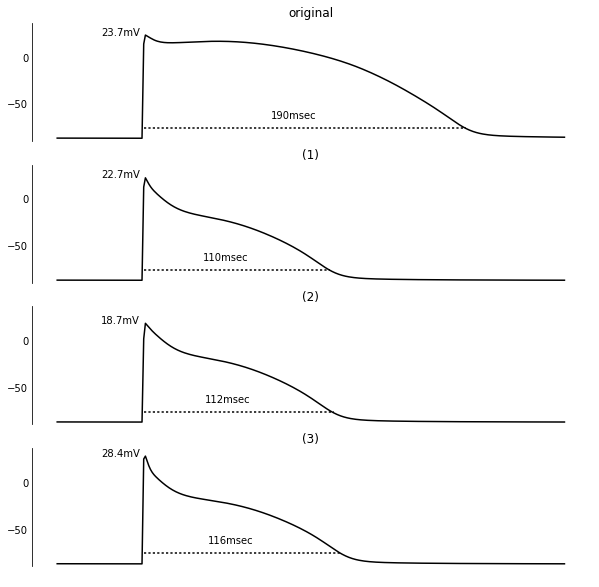

In [160]:
linestyles = ['solid', 'dotted', 'dashed', 'solid']
plt.subplots_adjust(hspace=0.6)
plt.figure(figsize=(10,10))
for i, row in df.iterrows():
    plt.subplot(len(vmem_all.keys()), 1, i+1)
    offset = 400*1-50
    key = row['setting']
    vmem = vmem_all[key][offset:offset+300]
    vmem_thre, f_start, apd = calc_apd(vmem, r_thre=0.9)
    
    print key, vmem.max(), apd
    
    plt.title(key)
    plt.plot(vmem, c='k')#, linestyle=linestyles[i])
    plt.plot([f_start, f_start+apd], [vmem_thre, vmem_thre], c='k', linestyle='dotted')
    
    plt.text(f_start+apd/2 - 20, vmem_thre+10, '{0}msec'.format(apd))
    plt.text(f_start - 25, vmem.max(), '{0:.1f}mV'.format(vmem.max()))
    plt.ylim([-90, 37])
    plt.xticks(color="None")
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tick_params(length=0)
    #plt.gca().spines['left'].set_visible(False)
    #plt.xlabel('time [ms]')
    #plt.ylabel('Vm [mV]')
    #plt.legend()
#plt.xticks(color="k")
#plt.xlabel('time [msec]')